In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
#datasets 
diabetes_dataset = pd.read_csv('data/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_dataset.describe().sum()

Pregnancies                  802.214630
Glucose                     1476.117149
BloodPressure               1192.461276
SkinThickness                958.488676
Insulin                     1966.793482
BMI                          970.876738
DiabetesPedigreeFunction     772.543705
Age                         1009.001117
Outcome                      770.825910
dtype: float64

In [7]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [17]:
X.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
179,5,130,82,0,0,39.1,0.956,37
87,2,100,68,25,71,38.5,0.324,26
46,1,146,56,0,0,29.7,0.564,29
516,9,145,88,34,165,30.3,0.771,53
500,2,117,90,19,71,25.2,0.313,21


In [18]:
Y[:25]

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    1
16    1
17    1
18    0
19    1
20    0
21    0
22    1
23    1
24    1
Name: Outcome, dtype: int64

In [51]:
sc = StandardScaler()
sc.fit(X)

X_sc = sc.transform(X)


In [52]:
print(X_sc)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [53]:
#train test split
X_train ,X_test ,Y_train ,Y_test = train_test_split(X_sc,Y,random_state=2,test_size=0.3,stratify=Y)

In [54]:
X_train.shape , X_test.shape

((537, 8), (231, 8))

In [55]:
Y_train.shape , Y_test.shape

((537,), (231,))

In [67]:
#train model ML
classifer_diabetes = svm.SVC(kernel='linear')
classifer_diabetes.fit(X_train,Y_train)

SVC(kernel='linear')

In [57]:
X_train_pred = classifer_diabetes.predict(X_train)

In [58]:

print('accuracy score of the training data =',accuracy_score(X_train_pred,Y_train)*100,'%')

accuracy score of the training data = 78.2122905027933 %


In [59]:
X_test_pred = classifer_diabetes.predict(X_test)

print('accuracy score of the test data =',accuracy_score(X_test_pred,Y_test)*100,'%')

accuracy score of the test data = 77.48917748917748 %


In [74]:
input_data = (1,85,66,29,0,26.6,0.351,31)


input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
input_data_reshape

array([[ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input 

In [101]:
model = Sequential()

# model.add(Input(shape=(2,)))
model.add(Input(shape=(8,)))

model.add(Dense(32, activation='relu'))    
model.add(Dense(32, activation='relu'))  

model.add(Dense(1, activation='sigmoid'))   # 2 class (Binary classification)

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.output_shape

(None, 1)

In [90]:
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 8),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'confi

In [102]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [103]:
import time
start = time.time()
history = model.fit(X_train, Y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.25) # 10 +10 40 100
end = time.time()

print(f"Time Taken {end - start:.3f} secs")
print("Time Taken: {:.3f} secs".format(end - start))

Epoch 1/30
13/13 [==============================] - 2s 62ms/step - loss: 0.6305 - accuracy: 0.6791 - val_loss: 0.6212 - val_accuracy: 0.6889
Epoch 2/30
13/13 [==============================] - 0s 7ms/step - loss: 0.5749 - accuracy: 0.7338 - val_loss: 0.5858 - val_accuracy: 0.6889
Epoch 3/30
13/13 [==============================] - 0s 16ms/step - loss: 0.5399 - accuracy: 0.7438 - val_loss: 0.5590 - val_accuracy: 0.6889
Epoch 4/30
13/13 [==============================] - 0s 9ms/step - loss: 0.5117 - accuracy: 0.7587 - val_loss: 0.5349 - val_accuracy: 0.7333
Epoch 5/30
13/13 [==============================] - 0s 7ms/step - loss: 0.4899 - accuracy: 0.7836 - val_loss: 0.5181 - val_accuracy: 0.7481
Epoch 6/30
13/13 [==============================] - 0s 7ms/step - loss: 0.4731 - accuracy: 0.7811 - val_loss: 0.5072 - val_accuracy: 0.7556
Epoch 7/30
13/13 [==============================] - 0s 7ms/step - loss: 0.4614 - accuracy: 0.7910 - val_loss: 0.4983 - val_accuracy: 0.7704
Epoch 8/30
13/13 [

In [97]:
!pip install matplotlib


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

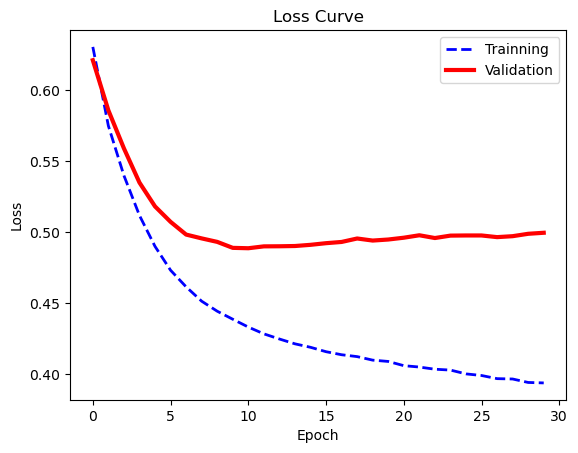

In [104]:
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Curve')
plt.show()

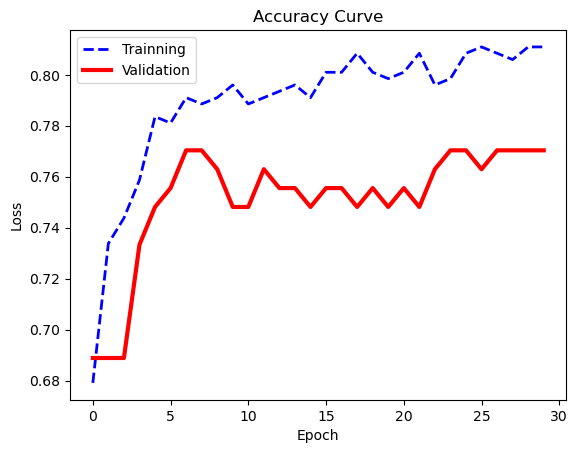

In [105]:
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

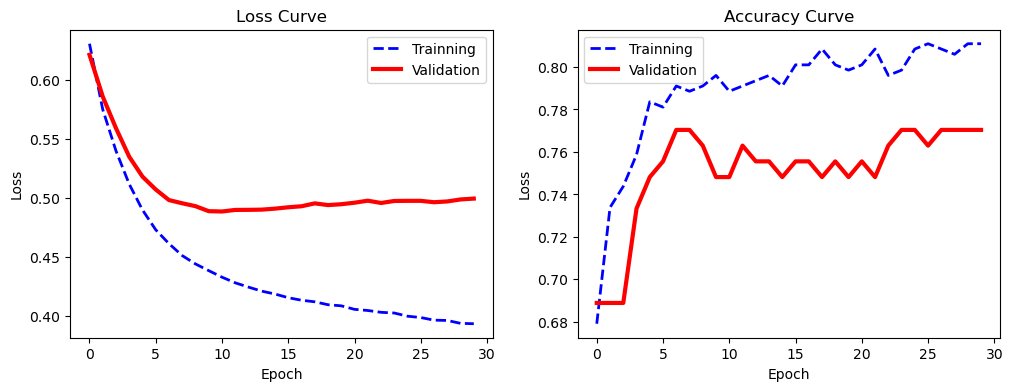

In [106]:
# 2 Columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)   # row column index
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
plt.title('Loss Curve')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)   # row column index
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [107]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.5109595656394958
Test accuracy: 0.7749


In [109]:
y_pred_pr = model.predict(X_test)
y_pred = (y_pred_pr > 0.5).astype(int) 


8/8 [==============================] - 0s 4ms/step


In [112]:
from sklearn.metrics import classification_report, confusion_matrix

print('Score->',score[1])

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Score-> 0.7748917937278748
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.75      0.54      0.63        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

[[135  15]
 [ 37  44]]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (768).

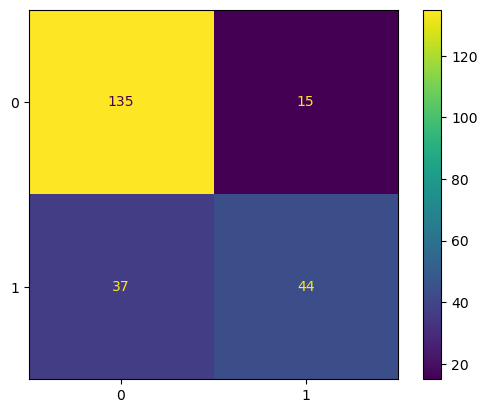

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=diabetes_dataset.Outcome).plot()
plt.title('Confusion Matrix')
plt.show()